In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
application_hist = pd.read_csv("../data/application_record.csv")
application_hist.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [3]:
credit_rec = pd.read_csv("../data/credit_record.csv")
credit_rec.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [4]:
credit_rec.shape


(1048575, 3)

In [5]:
application_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [6]:
# converting birthdates 
dt = datetime.now()

application_hist['DOB'] = dt + pd.to_timedelta(application_hist['DAYS_BIRTH'], unit='D')
application_hist['AGE'] = dt.year - pd.DatetimeIndex(application_hist['DOB']).year

# dropping cols with duplicate info and unnecessary info.
application_hist.drop(['FLAG_EMAIL','FLAG_PHONE','FLAG_MOBIL','FLAG_WORK_PHONE','DAYS_BIRTH'], axis=1, inplace=True)
application_hist.head()


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DOB,AGE
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,NaN,2.0,1989-05-08 06:09:39.736474,33
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,NaN,2.0,1989-05-08 06:09:39.736474,33
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,Security staff,2.0,1963-06-05 06:09:39.736474,59
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,Sales staff,1.0,1969-11-24 06:09:39.736474,53
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,Sales staff,1.0,1969-11-24 06:09:39.736474,53


In [7]:
application_hist.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_EMPLOYED,CNT_FAM_MEMBERS,AGE
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,60563.675328,2.194465,44.080457
std,5.716370e+05,0.724882,1.100869e+05,138767.799647,0.897207,11.459813
min,5.008804e+06,0.000000,2.610000e+04,-17531.000000,1.000000,21.000000
25%,5.609375e+06,0.000000,1.215000e+05,-3103.000000,2.000000,35.000000
50%,6.047745e+06,0.000000,1.607805e+05,-1467.000000,2.000000,43.000000
75%,6.456971e+06,1.000000,2.250000e+05,-371.000000,3.000000,54.000000
max,7.999952e+06,19.000000,6.750000e+06,365243.000000,20.000000,69.000000


In [8]:
#investigating extreme irregularities (19 children, 6 million salary)

application_hist.CNT_CHILDREN.unique()

array([ 0,  1,  3,  2,  4,  5, 14, 19,  7,  9, 12,  6])

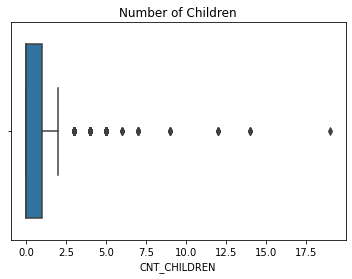

In [9]:
sns.boxplot(x=application_hist['CNT_CHILDREN']).set(title='Number of Children');

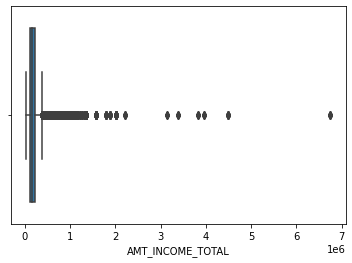

In [10]:
sns.boxplot(x=application_hist['AMT_INCOME_TOTAL']);

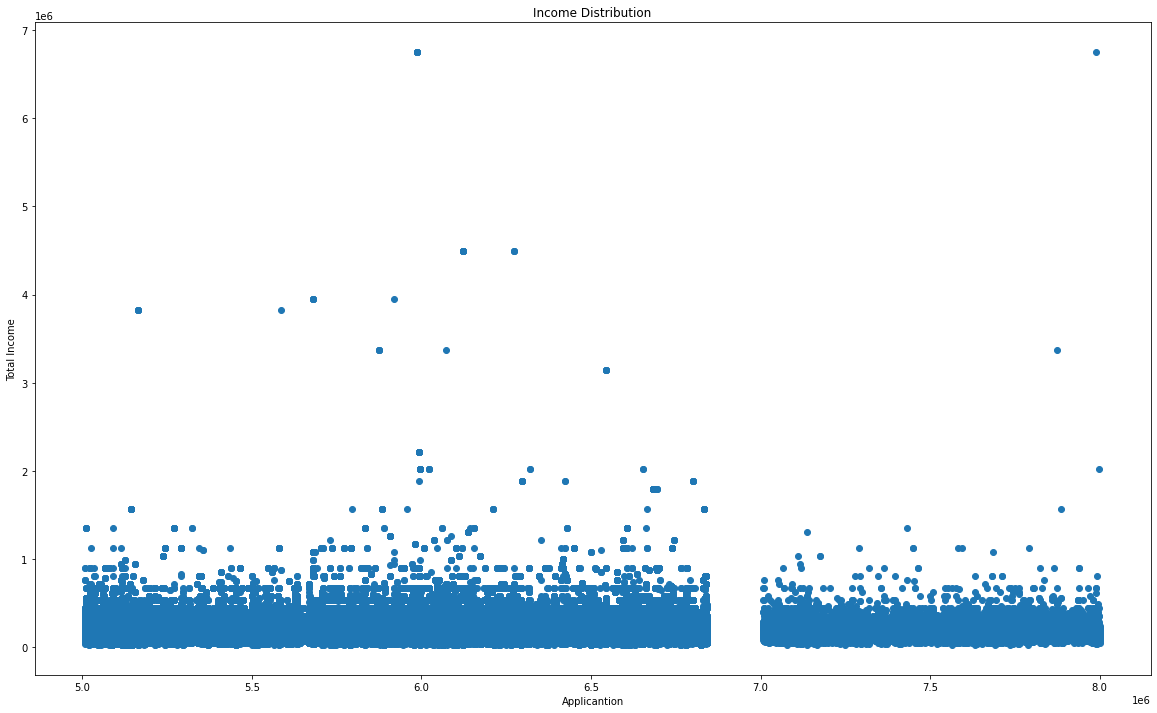

In [11]:
fig, ax = plt.subplots(figsize=(20,12))
ax.scatter(application_hist['ID'], application_hist['AMT_INCOME_TOTAL'])
ax.set_xlabel('Applicantion')
ax.set_ylabel('Total Income')
plt.title('Income Distribution')
plt.show()

In [12]:
mean = np.mean(application_hist['AMT_INCOME_TOTAL'])
std = np.std(application_hist['AMT_INCOME_TOTAL'])
application_hist['ZSCORE_AMT_INCOME_TOTAL'] = np.abs((application_hist['AMT_INCOME_TOTAL'] - mean)/std)
application_hist.shape

(438557, 16)

In [13]:
application_hist = application_hist.loc[application_hist['ZSCORE_AMT_INCOME_TOTAL']<3]
application_hist.shape

(433281, 16)

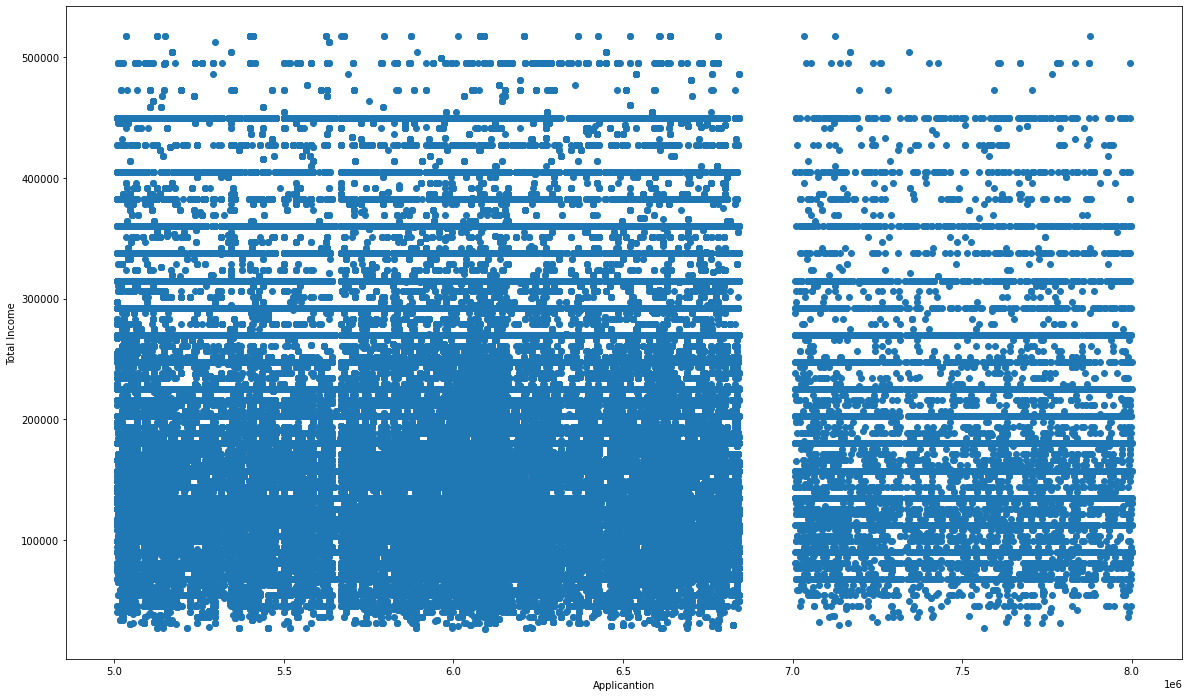

In [14]:
fig, ax = plt.subplots(figsize=(20,12))
ax.scatter(application_hist['ID'], application_hist['AMT_INCOME_TOTAL'])
ax.set_xlabel('Applicantion')
ax.set_ylabel('Total Income')

plt.show()

In [15]:
# Removing child count outliers
mean = np.mean(application_hist['CNT_CHILDREN'])
std = np.std(application_hist['CNT_CHILDREN'])
application_hist['ZSCORE_CNT_CHILDREN'] = np.abs((application_hist['CNT_CHILDREN'] - mean)/std)
application_hist.shape

(433281, 17)

In [16]:
application_hist_z = application_hist.loc[application_hist['ZSCORE_CNT_CHILDREN'] < 3]
application_hist_z.shape

(427330, 17)

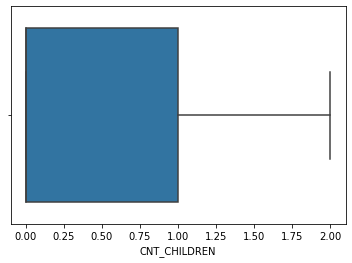

In [17]:
sns.boxplot(x=application_hist_z['CNT_CHILDREN']);

Unfortunately, the Z-Score removed too many applications. In the previous box-plot, 8 children appeared to be where there is some divergence. That will be cut-off point.

In [18]:
application_hist = application_hist.loc[application_hist['CNT_CHILDREN'] < 8]
application_hist.shape

(433268, 17)

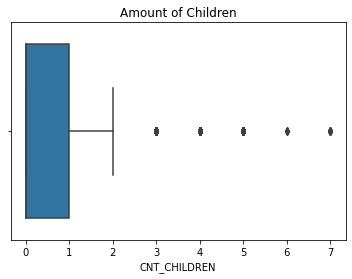

In [19]:
sns.boxplot(x=application_hist['CNT_CHILDREN']).set(title='Amount of Children');

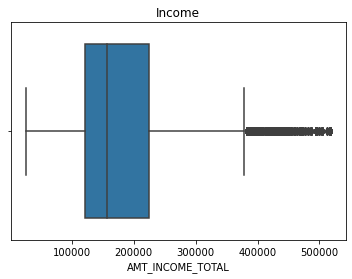

In [20]:
sns.boxplot(x=application_hist['AMT_INCOME_TOTAL']).set(title='Income');

In [21]:
application_hist.drop(['ZSCORE_CNT_CHILDREN','ZSCORE_AMT_INCOME_TOTAL'], axis=1, inplace=True)

In [22]:
print(f'Number of Applicant Records: {len(application_hist)}')
print(f'Number of Credit Records: {len(credit_rec)}')

Number of Applicant Records: 433268
Number of Credit Records: 1048575


In [23]:
application_hist.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_EMPLOYED               0
OCCUPATION_TYPE        133193
CNT_FAM_MEMBERS             0
DOB                         0
AGE                         0
dtype: int64

In [24]:
application_hist['OCCUPATION_TYPE'].unique()

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [25]:
# Labeling pensioners as retired in Occupation Type
application_hist.loc[(application_hist['NAME_INCOME_TYPE']=='Pensioner'), 'OCCUPATION_TYPE'] = 'Retired'

In [26]:
application_hist.isna().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_EMPLOYED              0
OCCUPATION_TYPE        58085
CNT_FAM_MEMBERS            0
DOB                        0
AGE                        0
dtype: int64

In [27]:
# # Labeling unemployed clients in Occupation Type
application_hist.loc[application_hist['DAYS_EMPLOYED']>0,'OCCUPATION_TYPE']='Unemployed'

In [28]:
application_hist.isna().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_EMPLOYED              0
OCCUPATION_TYPE        58085
CNT_FAM_MEMBERS            0
DOB                        0
AGE                        0
dtype: int64

In [29]:
# Filling missing values
application_hist['OCCUPATION_TYPE'].fillna('Other', inplace=True)

In [30]:
application_hist.isna().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_EMPLOYED          0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
DOB                    0
AGE                    0
dtype: int64

In [31]:
application_hist['UNEMPLOYED'] = 0
application_hist.loc[(application_hist['DAYS_EMPLOYED'] > 0) & (application_hist['OCCUPATION_TYPE'] != 'Retired'), 'UNEMPLOYED']=1
print(application_hist.shape)
application_hist.UNEMPLOYED.value_counts()

(433268, 16)


0    358186
1     75082
Name: UNEMPLOYED, dtype: int64

In [32]:
application_hist['OCCUPATION_TYPE'].unique()

array(['Other', 'Security staff', 'Sales staff', 'Unemployed',
       'Accountants', 'Laborers', 'Managers', 'Drivers', 'Core staff',
       'High skill tech staff', 'Cleaning staff', 'Private service staff',
       'Cooking staff', 'Low-skill Laborers', 'Medicine staff',
       'Secretaries', 'Waiters/barmen staff', 'HR staff', 'Realty agents',
       'IT staff', 'Retired'], dtype=object)

In [33]:
# Creating categories for employment type

Unskilled = ['Laborers','Cleaning staff','Low-skill Laborers', 'Laborers']
Semiskilled = ['Realty agents','Security staff', 'Sales staff','Drivers','Cooking staff','Waiters/barmen staff']
Skilled = ['IT staff', 'HR staff', 'Secretaries', 'Medicine staff', 'Accountants','Managers', 'High skill tech staff']
Other = ['Retired', 'Other','Unemployed','Core staff','Private service staff']

application_hist.loc[application_hist['OCCUPATION_TYPE'].isin(Unskilled), 'EMPLOYMENT_CAT']='Unskilled'
application_hist.loc[application_hist['OCCUPATION_TYPE'].isin(Semiskilled), 'EMPLOYMENT_CAT']='Semiskilled'
application_hist.loc[application_hist['OCCUPATION_TYPE'].isin(Skilled), 'EMPLOYMENT_CAT']='Skilled'
application_hist.loc[application_hist['OCCUPATION_TYPE'].isin(Other), 'EMPLOYMENT_CAT']='Other'

application_hist.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DOB,AGE,UNEMPLOYED,EMPLOYMENT_CAT
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,Other,2.0,1989-05-08 06:09:39.736474,33,0,Other
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,Other,2.0,1989-05-08 06:09:39.736474,33,0,Other
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,Security staff,2.0,1963-06-05 06:09:39.736474,59,0,Semiskilled
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,Sales staff,1.0,1969-11-24 06:09:39.736474,53,0,Semiskilled
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,Sales staff,1.0,1969-11-24 06:09:39.736474,53,0,Semiskilled


In [34]:
application_hist.drop(['OCCUPATION_TYPE'], axis=1, inplace=True)

In [35]:
application_hist.groupby(["EMPLOYMENT_CAT"]).count()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,CNT_FAM_MEMBERS,DOB,AGE,UNEMPLOYED
EMPLOYMENT_CAT,,,,,,,,,,,,,,,
Other,179256,179256,179256,179256,179256,179256,179256,179256,179256,179256,179256,179256,179256,179256,179256
Semiskilled,85442,85442,85442,85442,85442,85442,85442,85442,85442,85442,85442,85442,85442,85442,85442
Skilled,82637,82637,82637,82637,82637,82637,82637,82637,82637,82637,82637,82637,82637,82637,82637
Unskilled,85933,85933,85933,85933,85933,85933,85933,85933,85933,85933,85933,85933,85933,85933,85933


In [36]:
# Removing duplicates.
application_hist = application_hist.loc[(~application_hist.duplicated(subset=['CODE_GENDER','DOB'])), :] #28,864
application_hist.shape

(28864, 16)

In [37]:
application_hist['NAME_EDUCATION_TYPE'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [38]:
# Reducing educational demisionality


application_hist.loc[application_hist['NAME_EDUCATION_TYPE'] == 'Academic degree', 'HIGHEST_EDUCATION_COMPLETED'] = 'College'
application_hist.loc[application_hist['NAME_EDUCATION_TYPE'] == 'Higher education', 'HIGHEST_EDUCATION_COMPLETED'] = 'College'
application_hist.loc[application_hist['NAME_EDUCATION_TYPE'] == 'Secondary / secondary special','HIGHEST_EDUCATION_COMPLETED'] = 'High School'
application_hist.loc[application_hist['NAME_EDUCATION_TYPE'] == 'Incomplete higher','HIGHEST_EDUCATION_COMPLETED'] = 'High School'
application_hist.loc[application_hist['NAME_EDUCATION_TYPE'] == 'Lower secondary','HIGHEST_EDUCATION_COMPLETED'] = 'High School'

application_hist.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,CNT_FAM_MEMBERS,DOB,AGE,UNEMPLOYED,EMPLOYMENT_CAT,HIGHEST_EDUCATION_COMPLETED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,2.0,1989-05-08 06:09:39.736474,33,0,Other,College
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,2.0,1963-06-05 06:09:39.736474,59,0,Semiskilled,High School
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1.0,1969-11-24 06:09:39.736474,53,0,Semiskilled,High School
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,365243,1.0,1960-09-18 06:09:39.736474,62,1,Other,College
10,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-769,2.0,1976-01-10 06:09:39.736474,46,0,Skilled,College


In [39]:
application_hist.NAME_FAMILY_STATUS.unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

In [40]:
# Reducing family status demisionality
application_hist.loc[application_hist['NAME_FAMILY_STATUS'] == 'Civil marriage','NAME_FAMILY_STATUS'] = 'Married'
application_hist.loc[application_hist['NAME_FAMILY_STATUS'] == 'Widow','NAME_FAMILY_STATUS'] = 'Single'
application_hist.loc[application_hist['NAME_FAMILY_STATUS'] == 'Single / not married','NAME_FAMILY_STATUS'] = 'Single'
application_hist.loc[application_hist['NAME_FAMILY_STATUS'] == 'Separated','NAME_FAMILY_STATUS'] = 'Married'

application_hist.drop(['NAME_EDUCATION_TYPE'], axis=1, inplace=True)

application_hist.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,CNT_FAM_MEMBERS,DOB,AGE,UNEMPLOYED,EMPLOYMENT_CAT,HIGHEST_EDUCATION_COMPLETED
0,5008804,M,Y,Y,0,427500.0,Working,Married,Rented apartment,-4542,2.0,1989-05-08 06:09:39.736474,33,0,Other,College
2,5008806,M,Y,Y,0,112500.0,Working,Married,House / apartment,-1134,2.0,1963-06-05 06:09:39.736474,59,0,Semiskilled,High School
3,5008808,F,N,Y,0,270000.0,Commercial associate,Single,House / apartment,-3051,1.0,1969-11-24 06:09:39.736474,53,0,Semiskilled,High School
7,5008812,F,N,Y,0,283500.0,Pensioner,Married,House / apartment,365243,1.0,1960-09-18 06:09:39.736474,62,1,Other,College
10,5008815,M,Y,Y,0,270000.0,Working,Married,House / apartment,-769,2.0,1976-01-10 06:09:39.736474,46,0,Skilled,College


In [41]:
application_hist.loc[application_hist['FLAG_OWN_REALTY'] == 'Y']['NAME_HOUSING_TYPE'].value_counts()


House / apartment      18195
With parents             542
Municipal apartment      357
Rented apartment         197
Office apartment         121
Co-op apartment           65
Name: NAME_HOUSING_TYPE, dtype: int64

In [42]:
application_hist.loc[application_hist['FLAG_OWN_REALTY'] == 'N']['NAME_HOUSING_TYPE'].value_counts()

House / apartment      7498
With parents            896
Municipal apartment     600
Rented apartment        243
Office apartment        119
Co-op apartment          31
Name: NAME_HOUSING_TYPE, dtype: int64

There is already a column that flags whether or not the appliant owns property and is unemployed. To reduce deminsionality, the 'NAME_HOUSING_TYPE' and NAME_INCOME_TYPE are dropped.

In [43]:
application_hist.drop(['NAME_HOUSING_TYPE','NAME_INCOME_TYPE'], axis=1, inplace=True)

In [44]:
from pathlib import Path
print(Path.cwd())

/Users/brent/Documents/Flatiron/phase5/phase5/functions


In [45]:
application_hist.to_csv('/Users/brent/Documents/Flatiron/phase5/phase5/data/cleaned_data/application_hist.csv')  

In [46]:
# Investigating other data set

In [47]:
credit_rec.isna().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [48]:
credit_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [49]:
# C: paid off that month X: No loan for the month
# 0: 1-29 days past due  #mistakes happen
credit_rec['STATUS'].replace(['C','X'],0, inplace=True)

In [50]:
# converting to numeric 
credit_rec = credit_rec.apply(pd.to_numeric)

In [51]:
#1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days
credit_rec['STATUS'].replace([1,2,3,4,5],1, inplace=True)

In [52]:
credit_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype
---  ------          --------------    -----
 0   ID              1048575 non-null  int64
 1   MONTHS_BALANCE  1048575 non-null  int64
 2   STATUS          1048575 non-null  int64
dtypes: int64(3)
memory usage: 24.0 MB


In [53]:
credit_rec.to_csv('/Users/brent/Documents/Flatiron/phase5/phase5/data/cleaned_data/credit_rec.csv')  

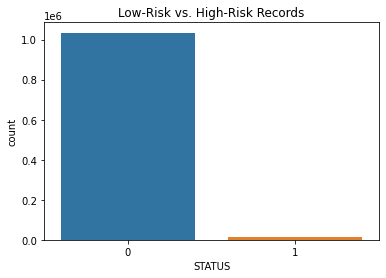

In [54]:
sns.countplot(x=credit_rec['STATUS']).set(title="Low-Risk vs. High-Risk Records")
plt.show()

In [55]:
# application_hist.hist(figsize=[12,10]);